In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [41]:
df=pd.read_csv('customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [42]:
df.drop('customerID',axis=1,inplace=True)

In [43]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [44]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [45]:
pd.to_numeric(df.TotalCharges,errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [46]:
df=df[df.TotalCharges!=' ']

In [47]:
df.TotalCharges=pd.to_numeric(df.TotalCharges.values)

In [48]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [49]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

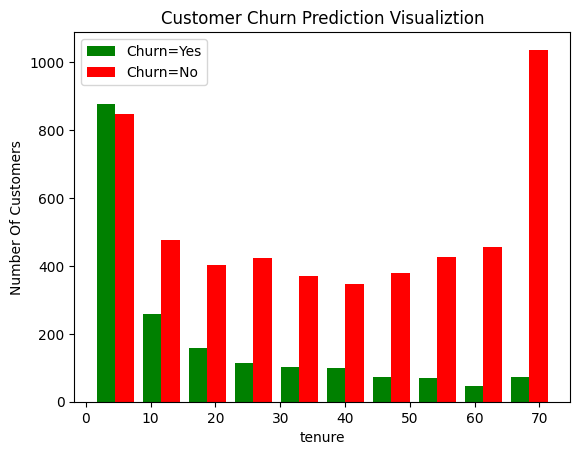

In [50]:
tenure_churn_yes=df[df.Churn=='Yes'].tenure
tenure_churn_No=df[df.Churn=='No'].tenure
plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")
plt.hist([tenure_churn_yes, tenure_churn_No], color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()


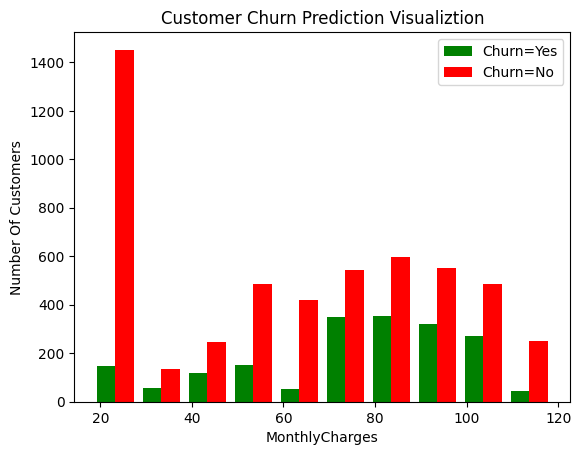

In [51]:
mc_churn_yes=df[df.Churn=='Yes'].MonthlyCharges
mc_churn_No=df[df.Churn=='No'].MonthlyCharges
plt.xlabel("MonthlyCharges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")
plt.hist([mc_churn_yes, mc_churn_No], color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()


In [52]:
def uniquqe_elements(df):
    for column in df:
        if df[column].dtype=='object':
             print(f'{column} is ',df[column].unique())

In [53]:
uniquqe_elements(df)

gender is  ['Female' 'Male']
Partner is  ['Yes' 'No']
Dependents is  ['No' 'Yes']
PhoneService is  ['No' 'Yes']
MultipleLines is  ['No phone service' 'No' 'Yes']
InternetService is  ['DSL' 'Fiber optic' 'No']
OnlineSecurity is  ['No' 'Yes' 'No internet service']
OnlineBackup is  ['Yes' 'No' 'No internet service']
DeviceProtection is  ['No' 'Yes' 'No internet service']
TechSupport is  ['No' 'Yes' 'No internet service']
StreamingTV is  ['No' 'Yes' 'No internet service']
StreamingMovies is  ['No' 'Yes' 'No internet service']
Contract is  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling is  ['Yes' 'No']
PaymentMethod is  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn is  ['No' 'Yes']


In [54]:
df.replace('No phone service','No',inplace=True)
df.replace('No internet service','No',inplace=True)

In [55]:
y_n_columns=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for i in y_n_columns:
    df[i].replace({'Yes':1,'No':0},inplace=True)

C:\Users\khali\AppData\Local\Temp\ipykernel_3852\3079418086.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].replace({'Yes':1,'No':0},inplace=True)
C:\Users\khali\AppData\Local\Temp\ipykernel_3852\3079418086.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[i].replace({'Yes':1,'No':0},

In [56]:
uniquqe_elements(df)

gender is  ['Female' 'Male']
InternetService is  ['DSL' 'Fiber optic' 'No']
Contract is  ['Month-to-month' 'One year' 'Two year']
PaymentMethod is  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [57]:
for col in df:
    print(f'{col}: {df[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [58]:
df1 = pd.get_dummies(data=df, columns=['gender','InternetService','Contract','PaymentMethod'],dtype='uint8')
df1.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'gender_Female',
       'gender_Male', 'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [59]:
df1.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,34,1,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,2,1,0,1,1,0,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,45,0,0,1,0,1,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,2,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [60]:
df1.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'gender_Female',
       'gender_Male', 'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [61]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']


scaler = MinMaxScaler()
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])


In [62]:
df1.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,0.000000,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0.464789,1,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0.014085,1,0,1,1,0,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0.619718,0,0,1,0,1,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0.014085,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [63]:
X=df1.drop('Churn',axis=1)
y=df1['Churn']

In [64]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [65]:
X_train.shape

(5625, 27)

In [66]:
X_test.shape

(1407, 27)

In [67]:
model=keras.Sequential([
    keras.layers.Dense(20,input_shape=(27,),activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=100)

Epoch 1/100


C:\Users\khali\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 979us/step - accuracy: 0.6462 - loss: 0.6073
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - accuracy: 0.7935 - loss: 0.4361
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - accuracy: 0.8059 - loss: 0.4192
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step - accuracy: 0.8029 - loss: 0.4137
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7982 - loss: 0.4267
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7995 - loss: 0.4150
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8066 - loss: 0.4069
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8048 - loss: 0.4212
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7992 - loss: 0.4196
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8053 - loss: 0.4101
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8158 - loss: 0.3918
Epoch 12/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [68]:
model.evaluate(X_test,y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7628 - loss: 0.4644 


[0.48090630769729614, 0.7668798565864563]

In [69]:
yp=model.predict(X_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [70]:
Y_pred=[]
for i in yp:
    if i>0.5:
        Y_pred.append(1)
    else:
        Y_pred.append(0)

In [71]:
y_test[:10]

2481    0
6784    0
6125    1
3052    0
4099    0
3223    0
3774    0
3469    0
3420    0
1196    0
Name: Churn, dtype: int64

In [72]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,Y_pred))


              precision    recall  f1-score   support

           0       0.82      0.87      0.85      1033
           1       0.57      0.48      0.52       374

    accuracy                           0.77      1407
   macro avg       0.70      0.67      0.68      1407
weighted avg       0.76      0.77      0.76      1407



Text(95.72222222222221, 0.5, 'Truth')

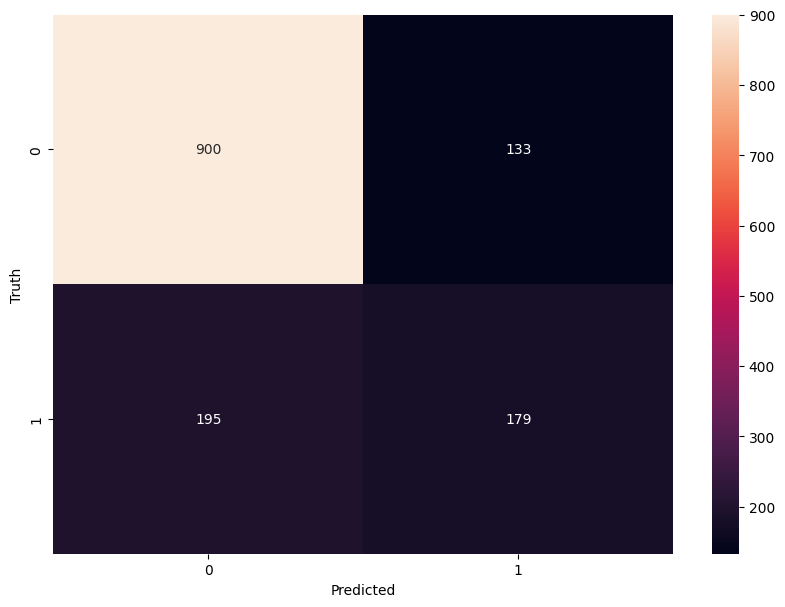

In [73]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=Y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')